In [1]:
import pandas as pd
import numpy as np

# Crear dataset de empleados
np.random.seed(42)
n_empleados = 500

df = pd.DataFrame({
    'id_empleado': range(1, n_empleados + 1),
    'edad': np.random.normal(35, 8, n_empleados).clip(22, 65).astype(int),
    'salario': np.random.lognormal(10.5, 0.4, n_empleados).round(0),
    'años_experiencia': np.random.normal(8, 4, n_empleados).clip(0, 30).astype(int),
    'departamento': np.random.choice(
        ['IT', 'Ventas', 'Marketing', 'RRHH', 'Finanzas'], n_empleados
    ),
    'nivel': np.random.choice(
        ['Junior', 'Senior', 'Lead', 'Manager'],
        n_empleados,
        p=[0.4, 0.4, 0.15, 0.05]
    )
})

print(f"Dataset creado: {df.shape[0]} empleados")
print(f"Columnas: {list(df.columns)}")

Dataset creado: 500 empleados
Columnas: ['id_empleado', 'edad', 'salario', 'años_experiencia', 'departamento', 'nivel']


In [2]:
df.head()

,id_empleado,edad,salario,años_experiencia,departamento,nivel
0,1,38,52600.0,13,RRHH,Junior
1,2,33,77946.0,11,RRHH,Senior
2,3,40,20756.0,8,Marketing,Lead
3,4,47,45487.0,5,IT,Senior
4,5,33,27994.0,10,Marketing,Junior


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_empleado       500 non-null    int64  
 1   edad              500 non-null    int64  
 2   salario           500 non-null    float64
 3   años_experiencia  500 non-null    int64  
 4   departamento      500 non-null    object 
 5   nivel             500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [4]:
df.describe()

,id_empleado,edad,salario,años_experiencia
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,34.690000,39715.180000,7.966000
std,144.481833,7.578705,16193.923815,3.946136
min,1.000000,22.000000,12348.000000,0.000000
25%,125.750000,29.000000,28620.750000,5.000000
50%,250.500000,35.000000,36732.000000,8.000000
75%,375.250000,40.000000,47121.750000,11.000000
max,500.000000,65.000000,104084.000000,18.000000


In [5]:
# ==============================
# MEDIDAS DE TENDENCIA CENTRAL
# ==============================

print("MEDIDAS DE TENDENCIA CENTRAL")
print("=" * 40)

# Variables numéricas
for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Moda: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'Sin moda única'}")

# Variables categóricas
print(f"\nDEPARTAMENTO MÁS COMÚN: {df['departamento'].mode().iloc[0]}")
print(f"NIVEL MÁS COMÚN: {df['nivel'].mode().iloc[0]}")

MEDIDAS DE TENDENCIA CENTRAL

EDAD:
  Media: 34.69
  Mediana: 35.00
  Moda: 35

SALARIO:
  Media: 39715.18
  Mediana: 36732.00
  Moda: 23566.0

AÑOS_EXPERIENCIA:
  Media: 7.97
  Mediana: 8.00
  Moda: 8

DEPARTAMENTO MÁS COMÚN: RRHH
NIVEL MÁS COMÚN: Senior


In [6]:
# ==============================
# MEDIDAS DE DISPERSIÓN
# ==============================
print("\nMEDIDAS DE DISPERSIÓN")
print("=" * 30)

for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")
    print(f"  Mínimo: {df[col].min()}")
    print(f"  Máximo: {df[col].max()}")
    print(f"  Rango: {df[col].max() - df[col].min()}")
    print(f"  Varianza: {df[col].var():.2f}")
    print(f"  Desviación estándar: {df[col].std():.2f}")
    print(f"  Coeficiente de variación: {df[col].std() / df[col].mean():.3f}")


MEDIDAS DE DISPERSIÓN

EDAD:
  Mínimo: 22
  Máximo: 65
  Rango: 43
  Varianza: 57.44
  Desviación estándar: 7.58
  Coeficiente de variación: 0.218

SALARIO:
  Mínimo: 12348.0
  Máximo: 104084.0
  Rango: 91736.0
  Varianza: 262243168.52
  Desviación estándar: 16193.92
  Coeficiente de variación: 0.408

AÑOS_EXPERIENCIA:
  Mínimo: 0
  Máximo: 18
  Rango: 18
  Varianza: 15.57
  Desviación estándar: 3.95
  Coeficiente de variación: 0.495


In [7]:
# ==============================
# PERCENTILES Y DISTRIBUCIÓN
# ==============================
print("\n\nANÁLISIS DE PERCENTILES")
print("=" * 25)

# Variables numéricas a analizar
for col in ['edad', 'salario', 'años_experiencia']:
    print(f"\n{col.upper()}:")

    # Percentiles clave
    percentiles = df[col].quantile([0.10, 0.25, 0.50, 0.75, 0.90])
    for p, v in percentiles.items():
        print(f"  P{int(p*100)}: {v:.2f}")

    # Cálculo del IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    print(f"  IQR (Q3 - Q1): {iqr:.2f}")

    # Límites para detección de outliers (método IQR)
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    print(f"  Límite inferior: {limite_inferior:.2f}")
    print(f"  Límite superior: {limite_superior:.2f}")

    # Conteo de outliers
    outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    print(f"  Outliers detectados (IQR): {outliers}")



ANÁLISIS DE PERCENTILES

EDAD:
  P10: 25.00
  P25: 29.00
  P50: 35.00
  P75: 40.00
  P90: 45.00
  IQR (Q3 - Q1): 11.00
  Límite inferior: 12.50
  Límite superior: 56.50
  Outliers detectados (IQR): 2

SALARIO:
  P10: 21990.90
  P25: 28620.75
  P50: 36732.00
  P75: 47121.75
  P90: 61840.40
  IQR (Q3 - Q1): 18501.00
  Límite inferior: 869.25
  Límite superior: 74873.25
  Outliers detectados (IQR): 19

AÑOS_EXPERIENCIA:
  P10: 3.00
  P25: 5.00
  P50: 8.00
  P75: 11.00
  P90: 13.00
  IQR (Q3 - Q1): 6.00
  Límite inferior: -4.00
  Límite superior: 20.00
  Outliers detectados (IQR): 0


In [8]:
print("ANÁLISIS POR DEPARTAMENTO")
print("=" * 30)

dept_stats = df.groupby('departamento').agg({
    'salario': ['mean', 'median', 'std', 'count'],
    'edad': ['mean', 'min', 'max']
}).round(2)

dept_stats

ANÁLISIS POR DEPARTAMENTO


salario                            edad        
                  mean   median       std count   mean min max
departamento                                                  
Finanzas      39400.97  35745.0  17512.32    97  34.45  22  59
IT            39004.76  35310.0  16511.62   109  34.73  22  50
Marketing     39298.89  38299.0  14486.98   101  34.31  22  51
RRHH          40449.09  39102.0  14913.70   115  35.04  22  65
Ventas        40555.69  36957.5  18173.55    78  34.90  22  56

In [9]:
print("ANÁLISIS POR NIVEL")
print("=" * 20)

nivel_stats = df.groupby('nivel').agg({
    'salario': 'mean',
    'años_experiencia': 'mean',
    'edad': 'mean'
}).round(2)

nivel_stats

ANÁLISIS POR NIVEL


,salario,años_experiencia,edad
nivel,,,
Junior,39307.28,7.88,35.12
Lead,38850.40,8.37,34.92
Manager,40954.41,7.05,33.09
Senior,40309.09,7.96,34.38


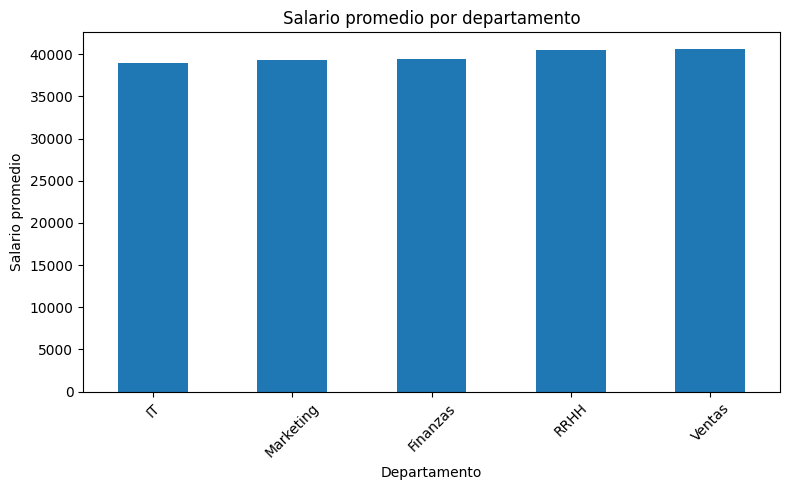

In [10]:
import matplotlib.pyplot as plt

# Salario promedio por departamento
salario_dept = df.groupby('departamento')['salario'].mean().sort_values()

plt.figure(figsize=(8,5))
salario_dept.plot(kind='bar')
plt.title('Salario promedio por departamento')
plt.ylabel('Salario promedio')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

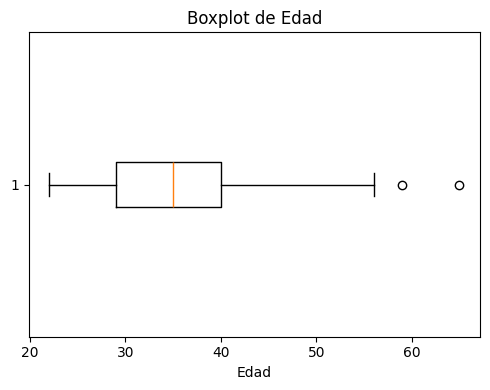

In [18]:
plt.figure(figsize=(5,4))
plt.boxplot(df['edad'], vert=False)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')

plt.tight_layout()
plt.savefig('boxplot_edad.png')  # Guarda la imagen
plt.show()                        # Muestra en pantalla
plt.close()

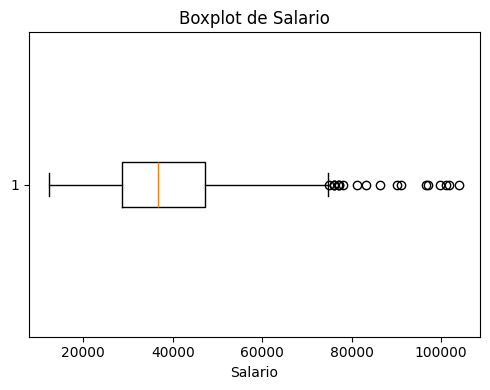

In [19]:
plt.figure(figsize=(5,4))
plt.boxplot(df['salario'], vert=False)
plt.title('Boxplot de Salario')
plt.xlabel('Salario')

plt.tight_layout()
plt.savefig('boxplot_salario.png')  # Guarda la imagen
plt.show()                           # Muestra en pantalla
plt.close()

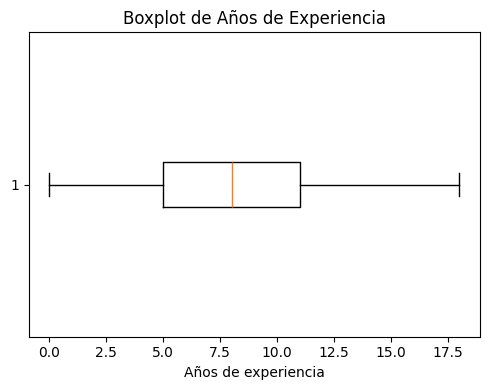

In [20]:
plt.figure(figsize=(5,4))
plt.boxplot(df['años_experiencia'], vert=False)
plt.title('Boxplot de Años de Experiencia')
plt.xlabel('Años de experiencia')

plt.tight_layout()
plt.savefig('boxplot_años_experiencia.png')  # Guarda la imagen
plt.show()                           # Muestra en pantalla
plt.close()

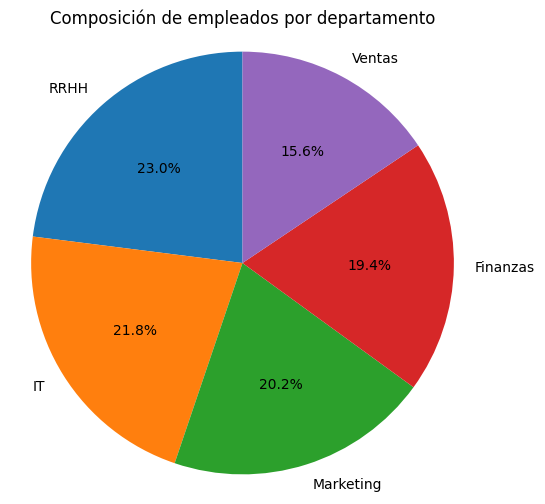

In [14]:
dept_count = df['departamento'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(dept_count, labels=dept_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Composición de empleados por departamento')
plt.axis('equal')
plt.show()

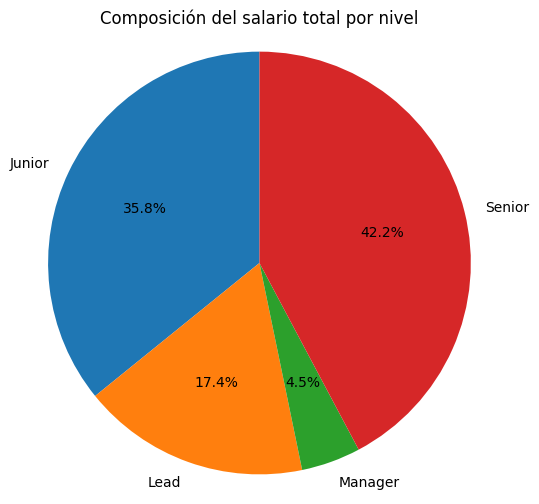

In [15]:
salario_nivel = df.groupby('nivel')['salario'].sum()

plt.figure(figsize=(6,6))
plt.pie(salario_nivel, labels=salario_nivel.index, autopct='%1.1f%%', startangle=90)
plt.title('Composición del salario total por nivel')
plt.axis('equal')
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# TABLAS DE EVIDENCIA
# =========================

# 1. Tendencia central
tendencia = pd.DataFrame({
    'Variable': ['Edad', 'Salario', 'Años_experiencia'],
    'Media': [df['edad'].mean(), df['salario'].mean(), df['años_experiencia'].mean()],
    'Mediana': [df['edad'].median(), df['salario'].median(), df['años_experiencia'].median()],
    'Moda': [
        df['edad'].mode().iloc[0],
        df['salario'].mode().iloc[0],
        df['años_experiencia'].mode().iloc[0]
    ]
}).round(2)

# 2. Dispersión
dispersion = pd.DataFrame({
    'Variable': ['Edad', 'Salario', 'Años_experiencia'],
    'Min': [df['edad'].min(), df['salario'].min(), df['años_experiencia'].min()],
    'Max': [df['edad'].max(), df['salario'].max(), df['años_experiencia'].max()],
    'Rango': [
        df['edad'].max() - df['edad'].min(),
        df['salario'].max() - df['salario'].min(),
        df['años_experiencia'].max() - df['años_experiencia'].min()
    ],
    'Varianza': [df['edad'].var(), df['salario'].var(), df['años_experiencia'].var()],
    'Desviacion_std': [df['edad'].std(), df['salario'].std(), df['años_experiencia'].std()],
    'Coef_var': [
        df['edad'].std() / df['edad'].mean(),
        df['salario'].std() / df['salario'].mean(),
        df['años_experiencia'].std() / df['años_experiencia'].mean()
    ]
}).round(2)

# 3. Percentiles
percentiles = []
for col in ['edad', 'salario', 'años_experiencia']:
    q = df[col].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
    percentiles.append([col, q[0.1], q[0.25], q[0.5], q[0.75], q[0.9], q[0.75] - q[0.25]])

percentiles_df = pd.DataFrame(
    percentiles,
    columns=['Variable', 'P10', 'P25', 'P50', 'P75', 'P90', 'IQR']
).round(2)

# 4. Análisis por departamento
salario_departamento = df.groupby('departamento').agg(
    salario_mean=('salario', 'mean'),
    salario_median=('salario', 'median'),
    salario_std=('salario', 'std'),
    empleados=('salario', 'count')
).round(2)

# 5. Análisis por nivel
salario_nivel = df.groupby('nivel').agg(
    salario_promedio=('salario', 'mean'),
    edad_promedio=('edad', 'mean'),
    experiencia_promedio=('años_experiencia', 'mean')
).round(2)

# =========================
# GRÁFICOS
# =========================

# 1. Barras – salario promedio por departamento
plt.figure()
salario_departamento['salario_mean'].plot(kind='bar', title='Salario promedio por departamento')
plt.ylabel('Salario')
plt.tight_layout()
plt.savefig('salario_promedio_departamento.png')
plt.close()

# 2. Boxplots
plt.figure()
df[['edad', 'salario', 'años_experiencia']].boxplot()
plt.title('Distribución de variables numéricas')
plt.tight_layout()
plt.savefig('boxplot_variables.png')
plt.close()

# 3. Pie – composición de empleados
plt.figure()
df['departamento'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Composición de empleados por departamento')
plt.ylabel('')
plt.tight_layout()
plt.savefig('composicion_empleados_departamento.png')
plt.close()

# 4. Pie – composición salarial por nivel
plt.figure()
salario_nivel['salario_promedio'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Composición salarial por nivel')
plt.ylabel('')
plt.tight_layout()
plt.savefig('composicion_salarial_nivel.png')
plt.close()

# =========================
# EXPORTAR EXCEL
# =========================

with pd.ExcelWriter('Evidencia_EDA_Dia2.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='dataset_completo', index=False)
    tendencia.to_excel(writer, sheet_name='tendencia_central', index=False)
    dispersion.to_excel(writer, sheet_name='dispersion', index=False)
    percentiles_df.to_excel(writer, sheet_name='percentiles', index=False)
    salario_departamento.to_excel(writer, sheet_name='salario_por_departamento')
    salario_nivel.to_excel(writer, sheet_name='salario_por_nivel')

print("Evidencia Día 2 generada correctamente:")
print("- Gráficos PNG")
print("- Evidencia_EDA_Dia2.xlsx")

Evidencia Día 2 generada correctamente:
- Gráficos PNG
- Evidencia_EDA_Dia2.xlsx


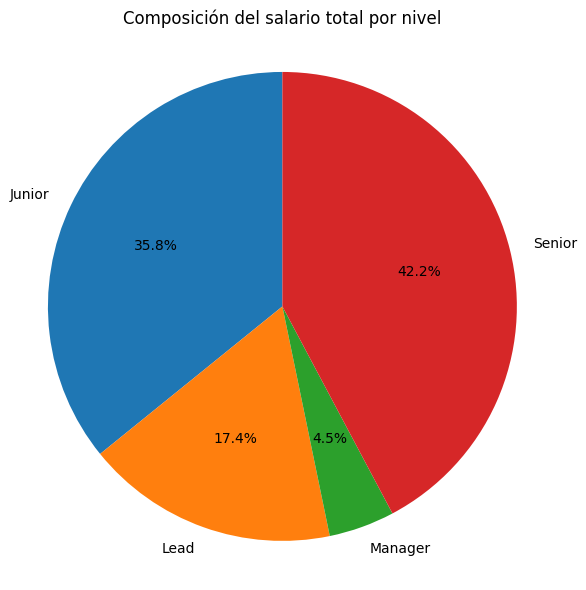

In [21]:
salario_nivel = df.groupby('nivel')['salario'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    salario_nivel,
    labels=salario_nivel.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Composición del salario total por nivel')
plt.axis('equal')

plt.tight_layout()
plt.savefig('composicion_salarial_nivel.png')
plt.show()
plt.close()